In [43]:
import numpy as np
import pandas as pd

In [44]:
# load the data from csv file to Pandas DataFrame
data = pd.read_csv('/content/sample_data/Restaurant_Reviews.tsv',delimiter='\t',quoting=3)

In [45]:
print(data)

                                                Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


In [25]:
data.shape

(1000, 2)

In [26]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [28]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
# Assuming you have a DataFrame named 'data' with a column named 'Review'
corpus = []

for i in range(0, 1000):
    # Preprocess the review text
    review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=data['Review'][i])
    review = review.lower()
    review_words = review.split()

    # Remove stopwords
    review_words = [word for word in review_words if not word  in set(stopwords.words('english'))]

    # Stemming using Porter Stemmer
    ps = PorterStemmer()
    review= [ps.stem(word) for word in review_words]

    # Join the stemmed words back into a string
    review = ' '.join(review)

    corpus.append(review)


In [48]:
corpus[:1500]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y= data.iloc[:,1].values

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [56]:
print(X.shape, X_train.shape, X_test.shape)

(1000, 1500) (800, 1500) (200, 1500)


In [57]:
from sklearn.naive_bayes import MultinomialNB

# Create a Multinomial Naive Bayes classifier
classifier = MultinomialNB()

# Train the classifier on your training data
classifier.fit(X_train, y_train)


MultinomialNB()

In [58]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1])

In [59]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")



Accuracy: 0.77
Precision: 0.76
Recall: 0.79


In [60]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)


Confusion Matrix:
[[72 25]
 [22 81]]


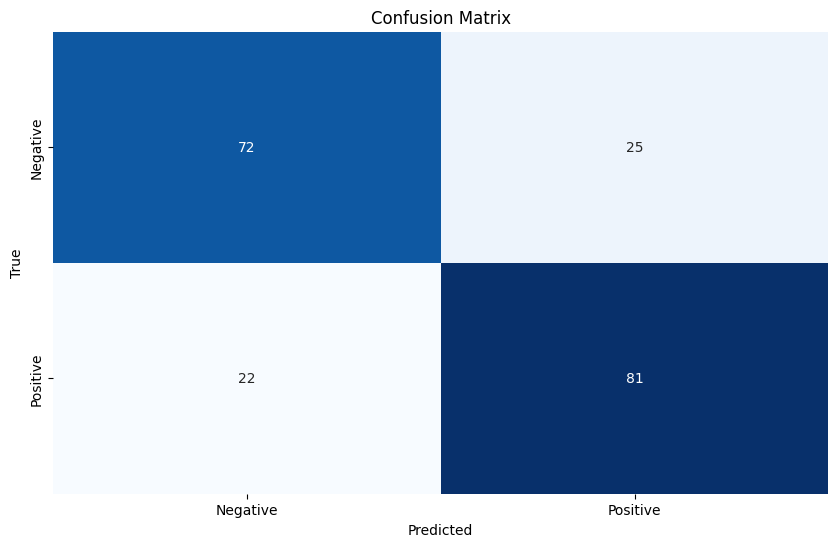

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have a confusion matrix 'confusion' already calculated

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [65]:
best_accuracy = 0.0
alpha_val =  0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train,y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test,temp_y_pred)
  print("Accuracy score for alpha={} is :{}%".format(round(i,1),round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print("---------------------------------------")
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100,2),round(alpha_val,1)))

Accuracy score for alpha=0.1 is :78.0%
Accuracy score for alpha=0.2 is :78.5%
Accuracy score for alpha=0.3 is :78.0%
Accuracy score for alpha=0.4 is :78.0%
Accuracy score for alpha=0.5 is :77.5%
Accuracy score for alpha=0.6 is :77.5%
Accuracy score for alpha=0.7 is :77.5%
Accuracy score for alpha=0.8 is :77.0%
Accuracy score for alpha=0.9 is :76.5%
Accuracy score for alpha=1.0 is :76.5%
---------------------------------------
The best accuracy is 78.5% with alpha value as 0.2


In [66]:
classifier = MultinomialNB(alpha=0.2)
classifier.fit(X_train,y_train)

MultinomialNB(alpha=0.2)

In [67]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]', repl='',string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)
  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)

In [78]:
print("Enter your Review for the Restaurant: ")
sample_review = input()
if predict_sentiment(sample_review):
    print("It is a Positive review")
else:
    print("It is a negative review")


Enter your Review for the Restaurant: 
nice
It is a Positive review
